# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
data = pd.read_csv("data/shopping_trends_updated.csv")

# Preview data
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

# Basic Data Cleaning

In [25]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values
data = data.dropna(subset=['Customer_ID', 'Payment_Method'])

# Rename the column 'Purchase Amount (USD)' to 'Purchase_Amount' and replace spaces with underscores
data.columns = data.columns.str.replace('Purchase Amount (USD)', 'Purchase_Amount')
data.columns = data.columns.str.replace(' ', '_')

print(data.info())

Customer_ID               0
Age                       0
Gender                    0
Item_Purchased            0
Category                  0
Purchase_Amount           0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment_Method            0
Frequency_of_Purchases    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item_Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   

# Descriptive Statistics

In [15]:
# Count of transactions by payment method
payment_counts = data['Payment_Method'].value_counts()
print(payment_counts)

Payment_Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


In [17]:
# Percentage of PayPal transactions
paypal_pct = payment_counts['PayPal'] / payment_counts.sum() * 100
print(f"PayPal Transactions: {paypal_pct:.2f}%")

PayPal Transactions: 17.36%


# Visualize Payment Method Usage

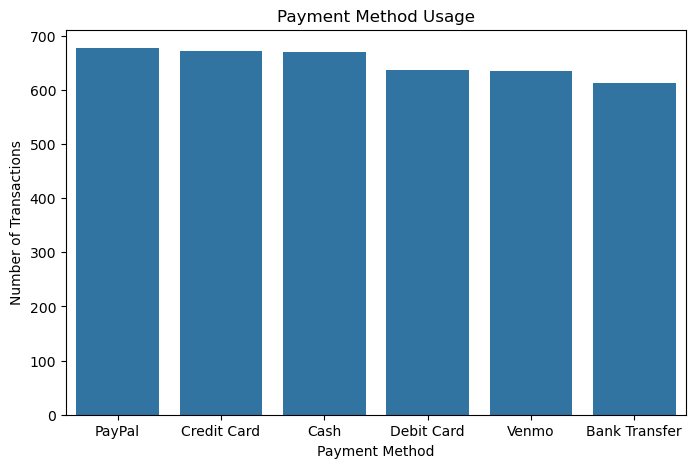

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Payment_Method', order=data['Payment_Method'].value_counts().index)
plt.title("Payment Method Usage")
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Method")
plt.show()